# 1. Import data sets and Load data set
Hint: Make use of with statement and write a function to load the data if you are not able to load through the panda's method.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [21]:
bank=pd.read_csv("bank.csv")

In [22]:
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## 2. A. Identify the Features data types before entering into the analysis¶

In [10]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## 2. B. Convert the datatypes which are wrongly identified according to the business(domain). 
Kindly use the User Defined function and loop to convert the data types once.

In [9]:
bank['marital'].astype('category')

0       married
1       married
2        single
3       married
4       married
         ...   
4516    married
4517    married
4518    married
4519    married
4520     single
Name: marital, Length: 4521, dtype: category
Categories (3, object): ['divorced', 'married', 'single']

## 2. C. Find and Remove missing if any.
Use visualization to find the missing values or Use general method to find the missing values.¶

In [11]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## 3. Find the average balance of the customer who belongs to the subscribed customer 
and non-subscribed customer and also use a related plot to show them in visualization.

In [12]:
pd.pivot_table(data=bank,index="y",values="balance")

,balance
y,
no,1403.211750
yes,1571.955854


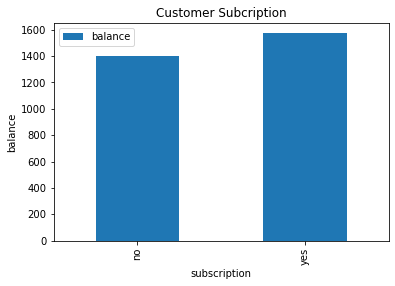

In [16]:
# categorical  and numerical variable
b3=pd.pivot_table(data=bank,index="y",values="balance").plot(kind='bar')
plt.title('Customer Subcription')
plt.xlabel('subscription')
plt.ylabel('balance')
plt.show()

## 4. Use a pie plot to find the distribution(frequency) of the education.
Make sure to add labels and show the percentage of each education distribution.

In [17]:
f=bank["education"].value_counts()
f

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

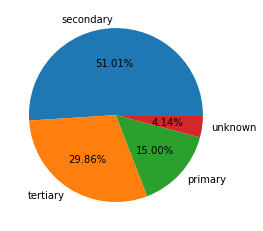

In [26]:
plt.pie(f.values,labels=f.index,autopct="%.2f%%")
plt.show()

## 5. Create a function that should be able to create a new feature(Variable) called season using the month column.


In [36]:
def new():
    bank["season"]=bank["month"].map({"dec":"winter","jan":"winter","feb":"winter","mar":"summer","apr":"summer","may":"summer",
                                    "jun":"rainy","jul":"rainy","aug":"rainy","sep":"rainy","oct":"autumn","nov":"autumn"})
    return bank

In [37]:
new()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,summer
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,summer
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,rainy
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,rainy
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,summer
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,rainy
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,winter


## 6.  Use the count plot with a variable that you created in the
above question and also the Y variable to find the class distribution.



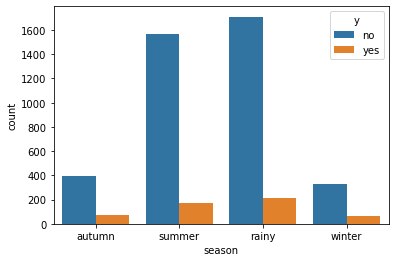

In [38]:
sns.countplot(data=bank,x='season',hue='y')
plt.show()

## 7. Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot.

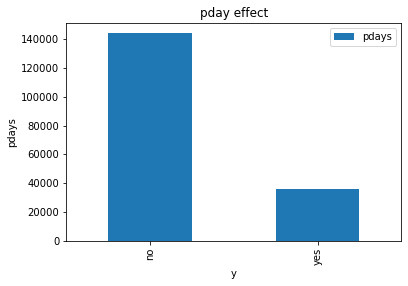

In [43]:
pd.pivot_table(data=bank,values='pdays',index='y',aggfunc=sum).plot(kind='bar')
plt.title('pday effect')
plt.ylabel('pdays')
plt.show()

## 8. Replace the -1 as nan values for the P-days store.

In [46]:
bank['pdays'] = bank['pdays'].replace(-1, np.nan)

### 9. Once you are done with question number 8,do the same analysis as question number 7. 
### And observe the difference between question number 7 and question number 9.¶

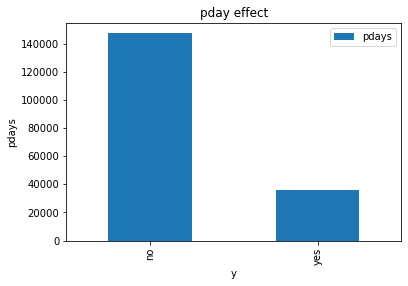

In [48]:
pd.pivot_table(data=bank,values='pdays',index='y',aggfunc=sum).plot(kind='bar')
plt.title('pday effect')
plt.ylabel('pdays')
plt.show()

## 10. Does the customer take the term subscription who has less than 0 balance?

In [56]:
cstr=bank[bank['balance']<0]


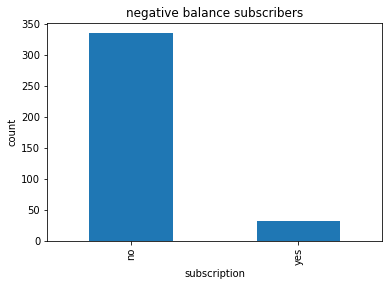

In [57]:
cstr['y'].value_counts().plot(kind='bar')
plt.xlabel('subscription')
plt.ylabel('count')
plt.title('negative balance subscribers')
plt.show()

## 11. Use Pivot table to find the maximum balance for each type of job.¶

In [60]:
pd.pivot_table(data=bank,values='balance',index='job',aggfunc='max')

,balance
job,
admin.,22171
blue-collar,16353
entrepreneur,42045
housemaid,26965
management,27359
retired,71188
self-employed,16430
services,26394
student,11555


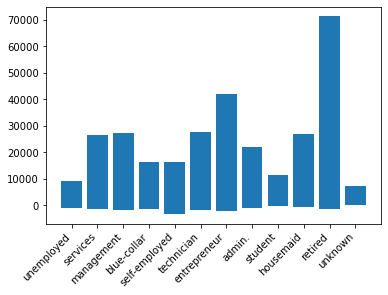

In [64]:
plt.bar(data=bank,x='job',height='balance')
plt.xticks(rotation=45, ha='right')
plt.show()

## 12. Use the Age, balance, and Y column to plot the scatter plot and find what kind of relationship Age and balance had, and See the points which belong 0 and 1 class and how they are distributed¶

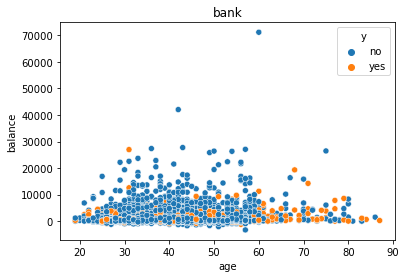

In [68]:
sns.scatterplot(data=bank,x='age',y='balance',hue='y')
plt.title('bank')
plt.show()

## 13. Use the violin plot and also the box plot to find the distribution of the balance for each class of the Y column. And try to tell why we have a Violin plot and Box plot both rather than one.


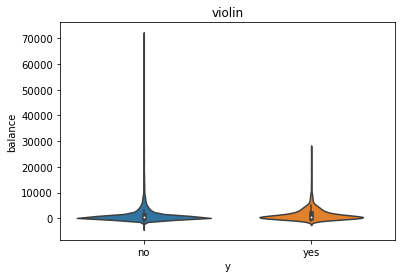

In [72]:
sns.violinplot(data=bank,x='y',y='balance')
plt.title('violin')
plt.show()

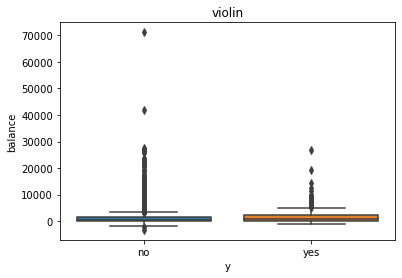

In [73]:
sns.boxplot(data=bank,x='y',y='balance')
plt.title('violin')
plt.show()

## 14. Use a pie plot to know the Proportion(distribution) of the defaulters and non-defaulters.

In [83]:
prop=bank['default'].value_counts()

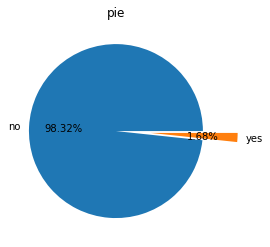

In [90]:
plt.pie(prop.values,labels=prop.index,autopct='%.2f%%',explode=[0,0.4])
plt.title('pie')
plt.show()

## 15. Use Box plot and strip plot to know the distribution of the Pdays with respect to Y classes and differentiate both plots.

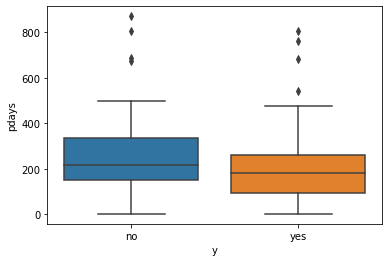

In [93]:
sns.boxplot(data = bank,x = "y",  
            y = "pdays")
plt.show()

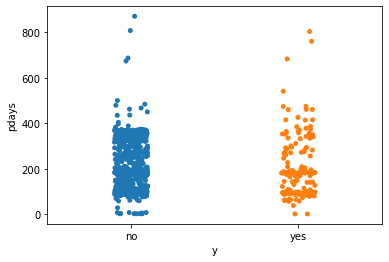

In [96]:
sns.stripplot(data = bank,x = "y", y = "pdays")
plt.show()